In [1]:
# Do not edit this cell

# course: 3654
# a: Homework 8
# d: VT

# Clustering and Data

**Enter your Name:**  Vik Chawla
    
**Enter your PID:**  vik3
    
I have neither given nor received unauthorized assistance on this assignment. See the course sylabus for details on the Honor Code policy. In particular, sharing lines of solution code is prohibited.

In [2]:
# Run this cell first.  Do NOT edit this cell.
Answer1 = Answer2 = Answer3 = Answer4 = Answer5 = None
import pandas
import numpy
import matplotlib
import matplotlib.pyplot
import sklearn.cluster
import sklearn.manifold
#%matplotlib inline
states = pandas.read_csv('states-big.csv') 
survey = pandas.read_csv('Survey-clean.csv')

 What are 5 clusters in the States data?  Extract and z-score normalize the meaningful quantitative columns (beginning with the "Area" column) of the states-big￼￼ data.  Then, compute k=5 clusters of states using the k-means algorithm.



In [3]:
# Problem 1
# Insert your work here

quant = states.iloc[:, 6:]
norm = (quant - quant.mean())/quant.std()
Ca = states.STATE_ABBR == 'CA'

Ca = norm.loc[(states.STATE_ABBR == "CA")]
Dc = norm.loc[(states.STATE_ABBR == "DC")]
La = norm.loc[(states.STATE_ABBR == "LA")]
Mt = norm.loc[(states.STATE_ABBR == "MT")]
Nh = norm.loc[(states.STATE_ABBR == "NH")]

# Ca = Ca.iloc[:, 5:]
# Dc = Dc.iloc[:, 5:]
# La = La.iloc[:, 5:]
# Mt = Mt.iloc[:, 5:]
# Nh = Nh.iloc[:, 6:]
df1 = {'CA': Ca.values, 'DC': Dc.values, 'LA': La.values,  'MT': Mt.values , 'NH': Nh.values}
df1 = pandas.DataFrame(Ca)
df1=df1.append(Dc)
df1 = df1.append(La)
df1 = df1.append(Mt)
df1 = df1.append(Nh)

# df1

#centroids = pandas.DataFrame(km.clusters_centers_, columns = df1.columns)

#df1 = {'CA': states.California} 

km = sklearn.cluster.KMeans(n_clusters=5, init = df1.values, n_init=1)
labels = km.fit_predict(norm)  # execute kmeans algorithm here
labels = pandas.DataFrame(labels, columns=['Cluster'])

df2 = {'STATE_NAME': states.STATE_NAME, 'Cluster': labels.Cluster}
df3 = pandas.DataFrame(df2)

Answer1 = df3.sort_values(by=['Cluster'])

Answer1

#print(states)
df1
survey

,Name,Section,Major,Status,Gender,Years,Age,Height,Born,Bedtime,...,Spicy,Siblings,Camp,Football,Birthday,Programmer,Math,Langs,HD,Smoothie
0,Xavier,North,Computer Science,Junior,Male,3.0,20,72.00,4180,12.0,...,50,1,1,0,60,80,95,5,288939438080,50
1,Grant,North,Industrial and Systems Engineering,Senior,Male,4.5,22,65.00,475,13.0,...,65,5,25,15,205,70,85,5,141200000000,70
2,Nick,North,Computer Science,Junior,Male,3.0,20,67.00,200,13.0,...,75,0,3,13,49,80,65,11,230023418472,65
3,Michael,North,Computational Modeling and Data Analytics,Junior,Male,2.5,21,74.00,260,14.0,...,65,3,10,8,331,88,60,4,71876277698,60
4,Kevin,North,Computer Science,Senior,Male,4.0,21,74.00,585,12.0,...,90,2,10,15,78,100,100,5,180122947600,100
5,Casey,North,Computational Modeling and Data Analytics,Senior,Female,2.5,20,67.00,287,12.0,...,65,1,5,15,101,50,75,3,205390000000,100
6,Aden,North,Computational Modeling and Data Analytics,Junior,Male,2.5,20,72.00,210,14.5,...,20,3,30,10,99,75,75,5,1106507772338,85
7,Hamsa,North,Computational Modeling and Data Analytics,Junior,Female,1.5,19,63.00,275,12.0,...,60,1,0,6,320,85,75,4,185000000000,50
8,Asha,North,Computational Modeling and Data Analytics,Senior,Female,2.0,19,62.00,2412,12.0,...,75,0,3,1,29,90,90,6,1106507772338,90
9,Brendan,North,Computer Science,Junior,Male,3.0,21,72.00,350,15.0,...,75,1,30,0,300,80,50,8,108430807040,50


 How can the data be reduced to 2 dimensions?  Use MDS with L2 Euclidean distance to reduce the dimensionality of the same z-scored quantitative columns to 2 dimensions (hint: MDS can compute L2 distances for you).


In Answer2, return a DataFrame containing the 'STATE_NAME' column and the new 'X' and 'Y' columns, sorted by increasing 'Y'.


In [4]:
# Problem 2
import sklearn.manifold
import sklearn.metrics.pairwise

distHD = sklearn.metrics.pairwise.euclidean_distances(norm)
distHD = pandas.DataFrame(distHD, columns = norm.index, index = norm.index)

ini = numpy.array(list(zip(norm['E_COLGRD_P'],norm['INCOME_PC'])))
mds = sklearn.manifold.MDS(n_components=2, \
        dissimilarity ='precomputed', n_init=1, eps =0, max_iter=1000)


data2D = mds.fit_transform(distHD, init = ini)

data3D = data2D
data3D = pandas.DataFrame(data2D, columns=['X','Y'])



data3D['STATE_NAME'] = states['STATE_NAME'] #states.STATE_NAME
#Answer2 = Answer2.append(data2D, states.STATE_NAME)


Answer2 = data3D[['STATE_NAME', 'X', 'Y']]

Answer2 = pandas.DataFrame(Answer2.sort_values('Y', ascending=True))          

Answer2
Answer2.shape


(51, 3)

How would you describe the categorization of the states?   Put the previous results together in a visualization.  Draw a scatterplot of the MDS result.  Color the dots by their cluster memberships. (What type of colormap should you use?)  Label each dot with its state abbreviation (hint: axes.text( )).  
Compute the 2D cluster centroids of the 2-dimensional X,Y data from MDS, and plot the centroids in the same plot, using the same color scheme, but make the centroids dots much larger than the state dots and give them transparency (alpha).



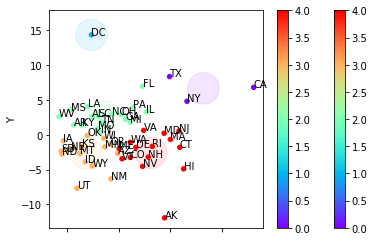

In [5]:
# Problem 3
temp = Answer2.copy()

#%matplotlib inline
ax = data3D.plot.scatter(x='X', y='Y', c = df3.Cluster, colormap = 'rainbow')

km2 = sklearn.cluster.KMeans(n_clusters=5, init = temp.values, n_init=1)
centroids = pandas.DataFrame(km.cluster_centers_)

temp['Cluster'] = Answer1.Cluster
group = temp.groupby('Cluster')
group = group.mean()

ax2 = group.plot.scatter(x='X', y='Y', c = group.index, colormap = 'rainbow', ax = ax, s = 1000, alpha = .10)

for i in range(0,51):
    ax.text(temp.X[i], temp.Y[i], states.STATE_ABBR[i])
   
    
Answer3 = group


 Is there a natural number of clusters for the States data?  Conduct an "elbow" analysis by re-running k-means with all possible values of k. Display a line plot, with circle markers, of 'total within-cluster variance' (kmeans.inertia_ ) as a function of k.  To get good results, you will want to use the default init='k-means++' parameter. For reasonable running times, use n_init=3 and max_iter=20. 



,K,Inertia
0,1,1750.000000
1,2,1417.261756
2,3,1152.553230
3,4,1018.271342
4,5,844.672492
5,6,735.153230
6,7,645.577640
7,8,550.729697
8,9,528.565871
9,10,466.690997


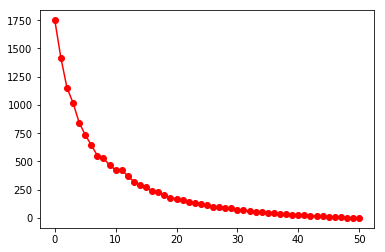

In [6]:
# Problem 4
import matplotlib.pyplot as plt 
stress = 0
clusterSize = []
stressSize = []
#km2 = sklearn.cluster.KMeans(n_clusters=0, init = 'k-means++', n_init= 3)
for i in range(1,52):
    km2 = sklearn.cluster.KMeans(n_clusters=i, init = 'k-means++', n_init= 3, max_iter = 20)
    labels = km2.fit_predict(norm)
    clusterSize.append(i)
    stressSize.append(km2.inertia_)
    

#plt.plot(clusterSize, c='blue') 
plt.plot(stressSize, c='red', marker = 'o')



Answer4 = pandas.DataFrame({'K':clusterSize, 'Inertia':stressSize})    

Answer4 = pandas.DataFrame(Answer4.sort_values('K', ascending=True))      







 Complete the following sentence: "There are two kinds of people in the world (well, in our class anyway), ..."  How would you describe those two kinds of people?

Using the Survey data, eliminate the Faculty member, z-score normalize the quantitative data, and then use k-means and Parallel Coordinates visualization of centroids to find the answer.
Hint:  Use clustering, and find out what is most different about their centroids.  Rerun your analysis several times to see what columns are most consistently most different.  Since this data is more complex, use n_init=100, max_iter=100.  Visually justify your claim with a Parallel Coordinates plot of the z-score centroids.


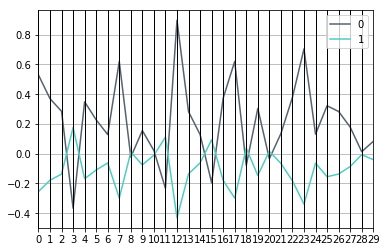

,0,1,2,3,4,5,6,7,8,9,...,21,22,23,24,25,26,27,28,29,Clusters
0,0.529177,0.370149,0.285075,-0.366363,0.349061,0.227623,0.128621,0.620530,-0.022719,0.155486,...,0.134892,0.378717,0.704566,0.131207,0.322184,0.283707,0.179149,0.013471,0.082814,0
1,-0.254541,-0.178046,-0.137125,0.176225,-0.167903,-0.109490,-0.061868,-0.298483,0.010928,-0.074791,...,-0.064885,-0.182168,-0.338905,-0.063112,-0.154975,-0.136467,-0.086173,-0.006480,-0.039835,1


In [7]:
# Problem 5
survey = survey.drop(survey.index[117])
quant = survey.iloc[:, 5:]
norm = (quant - quant.mean())/quant.std()

km3 = sklearn.cluster.KMeans(n_clusters=2, n_init= 100, max_iter = 100)
labels = km3.fit_predict(norm)
centroids = pandas.DataFrame(km3.cluster_centers_)

difference = abs(centroids.iloc[0] - centroids.iloc[1])

#difference = pandas.DataFrame(difference.sort_values(ascending=False))  

temp2 = difference.copy()

difference =  numpy.array(difference)
Answer5 = pandas.Series(difference)

Answer5.index = quant.columns.values
Answer5 = Answer5.sort_values(ascending=False)





Answer5

from matplotlib import pyplot as plt
df = Answer5.copy()
centroids['Clusters'] = [0, 1]

pandas.plotting.parallel_coordinates(
        centroids, 'Clusters',
        color=('#556270', '#4ECDC4', '#C7F464'))
plt.show()




In [8]:
# scratch space
